In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/banglafont/kalpurush.ttf
/kaggle/input/thesis1/merged.csv


In [2]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
CPU times: user 4.83 s, sys: 892 ms, total: 5.72 s
Wall time: 28.1 s


In [4]:
import pandas as pd
data = pd.read_csv("/kaggle/input/thesis1/merged.csv")
print(f'Total number of Documents: {len(data)}')

Total number of Documents: 7300


In [5]:
data.head()

,text,cleantext,label,source
0,সফটওয়্যার ইঞ্জিনিয়ারিং দুইটি শব্দ সফটওয়্যার...,সফটওয়্যার ইঞ্জিনিয়ারিং দুইটি শব্দ সফটওয়্যার...,Software Engineering,Principles of Software Engineering
1,সফটওয়্যার কিছু প্রোগ্রামের সমষ্টি,সফটওয়্যার হলো কিছু প্রোগ্রামের সমষ্টি,Software Engineering,Principles of Software Engineering
2,সমস্ত প্রোগ্রাম যখন কোন নির্ধারিত সমস্যা সমাধা...,সমস্ত প্রোগ্রাম যখন কোন নির্ধারিত সমস্যা সমাধা...,Software Engineering,Principles of Software Engineering
3,অপরদিকে ইঞ্জিনিয়ারিং বলতে যে সকল নীতিমালা ও ম...,অপরদিকে ইঞ্জিনিয়ারিং বলতে যে সকল নীতিমালা ও ম...,Software Engineering,Principles of Software Engineering
4,সফটওয়্যার ইঞ্জিনিয়ারিং বলতে কী বুঝায়,সফটওয়্যার ইঞ্জিনিয়ারিং বলতে কী বুঝায়,Software Engineering,Principles of Software Engineering


In [6]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'clean text' with the actual column name in your dataset
duplicates = data[data.duplicated(subset='text', keep=False)]

# 'duplicates' now contains all rows where the 'clean text' column has duplicate values
# You can inspect these entries to understand why they are duplicated

# To print the count of duplicated rows:
print(f"Number of duplicated rows: {len(duplicates)}")

Number of duplicated rows: 0


In [7]:
# Assuming 'duplicates' contains the duplicated rows
print(duplicates)

Empty DataFrame
Columns: [text, cleantext, label, source]
Index: []


In [8]:
# Assuming 'data' is your DataFrame with columns renamed
total_categories = data['label'].nunique()
print("Total number of categories:", total_categories)

Total number of categories: 6


In [9]:
# Assuming 'data' is your DataFrame with columns renamed
category_names = data['label'].unique()
print("Category names:", category_names)


Category names: ['Software Engineering' 'DBMS' 'Data Communication' 'Cyber Security '
 'Operating System' 'Cyber Security']


In [10]:
# Replace 'Cyber Security' and 'Cyber Security ' with 'Cyber Security'
data['label'] = data['label'].replace(['Cyber Security ', 'Cyber Security  '], 'Cyber Security')

# Replace 'Operating System' and 'operating System' with 'Operating System'
data['label'] = data['label'].replace(['Operating System', 'operating System'], 'Operating System')

In [11]:
# Assuming 'data' is your DataFrame with the 'label' column containing category names
unique_classes = data['label'].unique()
print("Unique classes:", unique_classes)

Unique classes: ['Software Engineering' 'DBMS' 'Data Communication' 'Cyber Security'
 'Operating System']


In [11]:
# Assuming `data` is your DataFrame and contains 'label', 'text', and 'source' columns

# Retrieve the unique classes
unique_classes = data['label'].unique()
print("Unique classes:", unique_classes)

# Iterate over each unique class and display one text example from each
for unique_class in unique_classes:
    # Filter the data for the current unique class
    class_data = data[data['label'] == unique_class]
    
    # Check if there is at least one row in the filtered data
    if not class_data.empty:
        # Select the first row in the filtered data
        first_example = class_data.iloc[10]
        
        # Display the text, label, and source for the selected row
        print(f"\nCategory: {unique_class}")
        print(f"Text: {first_example['text']}")
        print(f"Source: {first_example['source']}")


Unique classes: ['Software Engineering' 'DBMS' 'Data Communication' 'Cyber Security'
 'Operating System']

Category: Software Engineering
Text:  সফটওয়্যার ইঞ্জিনিয়ারিং এর নীতি ও পদ্ধতিসমূহ ব্যবহার করে সফটওয়্যার প্রোডাক্ট তৈরীর প্রক্রিয়াকে বলা হয় সফটওয়্যার বিবর্তন (Software evaluation)|
Source: Principles of Software Engineering

Category: DBMS
Text: এক কথায়, DBMS ডাটাবেস তৈরি, একসেস করা এবং তা রক্ষণাবেক্ষণের যাবতীয় কার্যাবলি সম্পাদন করে থাকে। 
Source: Database Management System

Category: Data Communication
Text: ক্যারিয়ার ওয়েভের অ্যামপ্লিচিউড সিগন্যাল ওয়েভের তাৎক্ষণিক মান অনুসারে পরিবর্তন করা হলে তাকে বলা হয় অ্যামপ্লিচিউড মড্যুলেশন (Amplitude modulation) বা সংক্ষেপে (AM.) 
Source: ডাটা কমিউনিকেশনস অ্যাপ্লিকেশনস 

Category: Cyber Security
Text: ভাইরাস হল এক ধরনের ক্ষতিকারক প্রোগ্রাম। 
Source: সাইবার সিকিউরিটি অ্যান্ড ইথিকস 

Category: Operating System
Text: অপারেটিং সিস্টেম কিছু সার্ভিস প্রদান করে, যা সরাসরি কম্পিউটার ব্যবহারকারীর জন্য সাহায্যকারী
Source: অপারেটিং সিস্টেম অ্যাপ্লিকেশ

In [12]:
data = data[['text','label']]

In [13]:
data = data.rename(columns={0:'text',1:'label'})

In [14]:
print("First rows of dataset")
data.head()

First rows of dataset


,text,label
0,সফটওয়্যার ইঞ্জিনিয়ারিং দুইটি শব্দ সফটওয়্যার...,Software Engineering
1,সফটওয়্যার কিছু প্রোগ্রামের সমষ্টি,Software Engineering
2,সমস্ত প্রোগ্রাম যখন কোন নির্ধারিত সমস্যা সমাধা...,Software Engineering
3,অপরদিকে ইঞ্জিনিয়ারিং বলতে যে সকল নীতিমালা ও ম...,Software Engineering
4,সফটওয়্যার ইঞ্জিনিয়ারিং বলতে কী বুঝায়,Software Engineering


In [15]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    #english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    #text=english_pattern.sub(r'', text)
    text = re.sub(r'₀|₁|₂|₃|₄|₅|₆|₇|₈|₉', '', text)
    #text = re.sub(r'⁰|¹|²|³|⁴|⁵|⁶|⁷|⁸|⁹|⁻|⁺|ⁿ|ᵗ', '', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=৳০১২৩৪৫৬৭৮৯012–34567•89।!()-−[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰θ→°π∈∝α≤≥Δβε≠�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out


In [16]:
data['cleaned'] = data['text'].apply(lambda x: preprocessing(str(x)))

In [17]:
# Print some cleaned text from the dataset
sample_data = range(4000, 5000)
for i in sample_data:
    print(data['cleaned'][i])

গ্রে হ্যাট হ্যাকাররা  আবার তা নিজের স্বার্থের জন্যও ব্যবহার করতে পারে
ব্ল্যাক হ্যাট হ্যাকার Black Hat Hacker এই ধরনের হ্যাকাররা সবচেয়ে ভয়ংকর প্রকৃতির হ্যাকার 
ব্ল্যাক হ্যাট হ্যাকার  কোনো একটি সিকিউরিটি সিস্টেমের ত্রুটিগুলো বের করলে দ্রুত ঐ ত্রুটিকে নিজের স্বার্থে কাজে লাগায় 
ব্ল্যাক হ্যাট হ্যাকার  এরা সিস্টেম নষ্ট করে বিভিন্ন ভাইরাস ছড়িয়ে দেয় 
ব্ল্যাক হ্যাট হ্যাকার  তারা ভবিষ্যতে নিজে আবার যেন ঢুকতে পারে সে পথ রাখে 
ব্ল্যাক হ্যাট হ্যাকার  সর্বোপরি ঐ সিস্টেমের অধীনে যেসকল সাবসিস্টেম রয়েছে সেগুলোতেও ঢুকতে চেষ্টা করে
ব্লাক হ্যাট হ্যাকারদের কারণেই সবচেয়ে বেশি সাইবার ক্রাইম হয় এবং ইন্টারনেটে ধবংসাত্মক ভাইরাস এরাই তৈরি করে থাকে
ক্রাক্যাররাও  একধরনের হ্যাকার তবে এরা বিভিন্ন সিস্টেমে ঢুকে সেটির অনেক কিছু পরিবর্তন করে এবং কম্পিউটার ভাইরাস দিয়ে সকল তথ্য মুছে দেয় 
 অনেক সময় বিভিন্ন ওয়েবসাইট হ্যাক করে তার বিনিময়ে টাকা দাবি করা হয় এ ধরনের হ্যাকারকে ক্র্যাকার বলা হয়
পৃথিবীর বিভিন্ন দেশে যেসব সাইবার আইন করা হয়েছে তা মূলত এসব ক্র্যাকারদের জন্যই করা হয়েছে 
ক্র্যাকাররা বিভিন্নভাবে কাজ করে থাকে
তারা অনেক

In [18]:
stop =["অতএব","অথচ","অথবা","অনুযায়ী","অনেক","অনেকে","অনেকেই","অন্তত","অন্য","অবধি","অবশ্য","অর্থাত","আই","আগামী","আগে","আগেই","আছে","আজ","আদ্যভাগে","আপনার","আপনি","আবার","আমরা","আমাকে","আমাদের","আমার","আমি","আর","আরও","ই","ইত্যাদি","ইহা","উচিত","উত্তর","উনি","উপর","উপরে","এ","এঁদের","এঁরা","এই","একই","একটি","একবার","একে","এক্","এখন","এখনও","এখানে","এখানেই","এটা","এটাই","এটি","এত","এতটাই","এতে","এদের","এব","এবং","এবার","এমন","এমনকী","এমনি","এর","এরা","এল","এস","এসে","ঐ","ও","ওঁদের","ওঁর","ওঁরা","ওই","ওকে","ওখানে","ওদের","ওর","ওরা","কখনও","কত","কবে","কমনে","কয়েক","কয়েকটি","করছে","করছেন","করতে","করবে","করবেন","করলে","করলেন","করা","করাই","করায়","করার","করি","করিতে","করিয়া","করিয়ে","করে","করেই","করেছিলেন","করেছে","করেছেন","করেন","কাউকে","কাছ","কাছে","কাজ","কাজে","কারও","কারণ","কি","কিংবা","কিছু","কিছুই","কিন্তু","কী","কে","কেউ","কেউই","কেখা","কেন","কোটি","কোন","কোনও","কোনো","ক্ষেত্রে","কয়েক","খুব","গিয়ে","গিয়েছে","গিয়ে","গুলি","গেছে","গেল","গেলে","গোটা","চলে","চান","চায়","চার","চালু","চেয়ে","চেষ্টা","ছাড়া","ছাড়াও","ছিল","ছিলেন","জন","জনকে","জনের","জন্য","জন্যওজে","জানতে","জানা","জানানো","জানায়","জানিয়ে","জানিয়েছে","জে","জ্নজন","টি","ঠিক","তখন","তত","তথা","তবু","তবে","তা","তাঁকে","তাঁদের","তাঁর","তাঁরা","তাঁাহারা","তাই","তাও","তাকে","তাতে","তাদের","তার","তারপর","তারা","তারৈ","তাহলে","তাহা","তাহাতে","তাহার","তিনঐ","তিনি","তিনিও","তুমি","তুলে","তেমন","তো","তোমার","থাকবে","থাকবেন","থাকা","থাকায়","থাকে","থাকেন","থেকে","থেকেই","থেকেও","দিকে","দিতে","দিন","দিয়ে","দিয়েছে","দিয়েছেন","দিলেন","দু","দুই","দুটি","দুটো","দেওয়া","দেওয়ার","দেওয়া","দেখতে","দেখা","দেখে","দেন","দেয়","দ্বারা","ধরা","ধরে","ধামার","নতুন","নয়","না","নাই","নাকি","নাগাদ","নানা","নিজে","নিজেই","নিজেদের","নিজের","নিতে","নিয়ে","নিয়ে","নেই","নেওয়া","নেওয়ার","নেওয়া","নয়","পক্ষে","পর","পরে","পরেই","পরেও","পর্যন্ত","পাওয়া","পাচ","পারি","পারে","পারেন","পি","পেয়ে","পেয়্র্","প্রতি","প্রথম","প্রভৃতি","প্রযন্ত","প্রাথমিক","প্রায়","প্রায়","ফলে","ফিরে","ফের","বক্তব্য","বদলে","বন","বরং","বলতে","বলল","বললেন","বলা","বলে","বলেছেন","বলেন","বসে","বহু","বা","বাদে","বার","বি","বিনা","বিভিন্ন","বিশেষ","বিষয়টি","বেশ","বেশি","ব্যবহার","ব্যাপারে","ভাবে","ভাবেই","মতো","মতোই","মধ্যভাগে","মধ্যে","মধ্যেই","মধ্যেও","মনে","মাত্র","মাধ্যমে","মোট","মোটেই","যখন","যত","যতটা","যথেষ্ট","যদি","যদিও","যা","যাঁর","যাঁরা","যাওয়া","যাওয়ার","যাওয়া","যাকে","যাচ্ছে","যাতে","যাদের","যান","যাবে","যায়","যার","যারা","যিনি","যে","যেখানে","যেতে","যেন","যেমন","র","রকম","রয়েছে","রাখা","রেখে","লক্ষ","শুধু","শুরু","সঙ্গে","সঙ্গেও","সব","সবার","সমস্ত","সম্প্রতি","সহ","সহিত","সাথে","সাধারণ","সামনে","সি","সুতরাং","সে","সেই","সেখান","সেখানে","সেটা","সেটাই","সেটাও","সেটি","স্পষ্ট","স্বয়ং","হইতে","হইবে","হইয়া","হওয়া","হওয়ায়","হওয়ার","হচ্ছে","হত","হতে","হতেই","হন","হবে","হবেন","হয়","হয়তো","হয়নি","হয়ে","হয়েই","হয়েছিল","হয়েছে","হয়েছেন","হল","হলে","হলেই","হলেও","হলো","হাজার","হিসাবে","হৈলে","হোক","হয়"]
display(stop)

['অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি',
 'অবশ্য',
 'অর্থাত',
 'আই',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'ই',
 'ইত্যাদি',
 'ইহা',
 'উচিত',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এই',
 'একই',
 'একটি',
 'একবার',
 'একে',
 'এক্',
 'এখন',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এব',
 'এবং',
 'এবার',
 'এমন',
 'এমনকী',
 'এমনি',
 'এর',
 'এরা',
 'এল',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'কখনও',
 'কত',
 'কবে',
 'কমনে',
 'কয়েক',
 'কয়েকটি',
 'করছে',
 'করছেন',
 'করতে',
 'করবে',
 'করবেন',
 'করলে',
 'করলেন',
 'করা',
 'করাই',
 'করায়',
 'করার',
 'করি',
 'করিতে',
 'করিয়া',
 'করিয়ে',
 'করে',
 'করেই',
 'করেছিলেন',
 'করেছে',
 'করেছেন',
 'করেন',
 'কাউকে',
 'কাছ',
 'কাছে',
 'কাজ',
 'কাজে',
 'কারও',
 '

In [19]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]

    out=' '.join(stm)

    return str(out)

In [20]:
# Apply the stopwordRemoval function to the 'clean text' column
data['cleaned'] = data['cleaned'].apply(lambda x: stopwordRemoval(str(x)))

# Iterate through the first 1000 rows and print the 'clean text' column values
sample_data = range(0, 1000)
for i in sample_data:
    print(data['cleaned'][i])

সফটওয়্যার ইঞ্জিনিয়ারিং দুইটি শব্দ সফটওয়্যার ইঞ্জিনিয়ারিংএর সমন্বয়ে গঠিত
সফটওয়্যার প্রোগ্রামের সমষ্টি
প্রোগ্রাম নির্ধারিত সমস্যা সমাধানের উদ্দেশ্যে তৈরি সফটওয়্যার প্রোডাক্ট
অপরদিকে ইঞ্জিনিয়ারিং সকল নীতিমালা মেথড সমূহ প্রোডাক্টটি Software ফিনিশিং প্রোডাক্ট সেগুলোর সুশৃঙ্খল প্রয়োগ করাকে বুঝায়
সফটওয়্যার ইঞ্জিনিয়ারিং বুঝায়
সফটওয়্যার ইঞ্জিনিয়ারিং ইঞ্জিনিয়ারিং শাখা সফটওয়্যার প্রডাক্ট ডেভেলপমেন্টের সুনির্ধারিত বৈজ্ঞানিক নীতিমালা Scientific principle মেথড ব্যবহৃত প্রক্রিয়া Procedures সম্পর্কিত
সফটওয়্যার ইঞ্জিনিয়ারিংএর outcome দক্ষ Efficient নির্ভরযোগ্য Reliable সফটওয়্যার প্রোডাক্ট
অর্থাৎ ডেভেলপমেন্ট অপারেশন সফটওয়্যার সংরক্ষণের সুষম শৃঙ্খলাবদ্ধ quantifiable পদ্ধতির সফল প্রয়োগই সফটওয়্যার ইঞ্জিনিয়ারিং
জার্মান কম্পিউটার বিজ্ঞানী Fritz Bauer মতে প্রকৃত মেশিনসমূহে কার্যকরিভাবে সাউন্ড ইঞ্জিনিয়ারিং Core Engineeringএর নীতিসমূহ সফটওয়্যার সমূহে সুষ্ঠ ব্যবহারই সফটওয়্যার ইঞ্জিনিয়ারিং
পরিশেষে পূর্ণ সফটওয়্যার ডিজাইন ডেভেলপমেন্ট রক্ষণাবেক্ষণের ইঞ্জিনিয়ারিং শাখা সফটওয়্যার ইঞ্জিনিয়ার

Total number of text: 7300


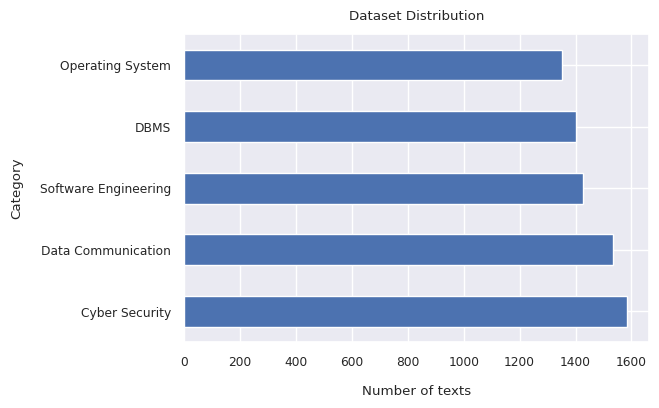

In [21]:
print(f'Total number of text: {len(data)}')
sns.set(font_scale=0.8)
data['label'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of texts", labelpad=12)
plt.ylabel("Category", labelpad=12)
plt.yticks(rotation = 0)
plt.title("Dataset Distribution", y=1.02);

In [22]:
import pandas as pd
import numpy as np

def data_summary(data):
    # Convert the 'text' column to strings and fill NaN values with an empty string
    data['text'] = data['text'].astype(str).fillna('')

    words = []
    u_words = []
    total_texts = []  # New list to store total number of texts in each category

    total_u_words = [word.strip().lower() for t in data['text'] for word in t.strip().split()]
    class_label = data['label'].unique()  # Use unique() to get unique class labels

    # Iterate over each class label
    for label in class_label:
        # Filter data for the current class
        class_data = data[data['label'] == label]

        # Count the total number of texts in the current class
        total_texts.append(len(class_data))

        # Generate list of words for the current class
        word_list = [word.strip().lower() for t in class_data['text'] for word in t.strip().split()]

        # Calculate counts of words
        counts = {}
        for word in word_list:
            counts[word] = counts.get(word, 0) + 1

        # Sort the dictionary of word list
        ordered = sorted(counts.items(), key=lambda item: item[1], reverse=True)

        # Total words per class
        words.append(len(word_list))

        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name: ", label)
        print(f"Total Number of Texts: {len(class_data)}")  # Output total number of texts
        print(f"Number of Words: {len(word_list)}")
        print(f"Number of Unique Words: {len(np.unique(word_list))}")
        print("Most Frequent Words:\n")
        for k, v in ordered[:10]:
            print(f"{k}\t{v}")

    print(f"Total Number of Unique Words: {len(np.unique(total_u_words))}")

    return words, u_words, class_label

# Assuming data is a DataFrame with 'text' and 'label' columns
words, u_words, class_names = data_summary(data)



Class Name:  Software Engineering
Total Number of Texts: 1428
Number of Words: 23282
Number of Unique Words: 4798
Most Frequent Words:

এবং	547
একটি	516
করা	497
করে	427
সফটওয়্যার	322
হয়	275
এর	264
জন্য	236
সফ্টওয়্যার	201
করতে	185

Class Name:  DBMS
Total Number of Texts: 1401
Number of Words: 21508
Number of Unique Words: 4160
Most Frequent Words:

ডাটাবেস	521
একটি	422
করা	388
এবং	327
করে	313
এর	312
ডাটা	259
বা	245
হয়।	210
এ	208

Class Name:  Data Communication
Total Number of Texts: 1534
Number of Words: 22559
Number of Unique Words: 5250
Most Frequent Words:

করা	396
একটি	389
এবং	337
করে	306
হয়।	260
বা	232
জন্য	211
এর	202
হয়	170
ব্যবহার	169

Class Name:  Cyber Security
Total Number of Texts: 1584
Number of Words: 24767
Number of Unique Words: 5613
Most Frequent Words:

বা	446
করে	395
একটি	374
এবং	367
করা	363
কম্পিউটার	243
জন্য	217
করার	187
সাইবার	184
কোনো	176

Class Name:  Operating System
Total Number of Texts: 1353
Number of Words: 20631
Number of Unique Words: 4401
Most Frequent

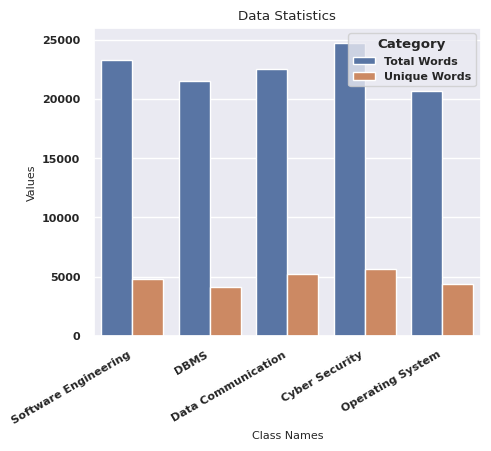

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming words, u_words, and class_names are already defined from data_summary function

# Create a DataFrame for the data matrix
data_matrix = pd.DataFrame({
    'Total Words': words,
    'Unique Words': u_words,
    'Class Names': class_names
})

# Melt the DataFrame for plotting
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")

# Set the desired font family and font size using rcParams
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 12,  # Adjust the font size as needed
    'font.weight': 'bold',
    'axes.labelsize': 8,  # Font size for axis labels
    'xtick.labelsize': 8,  # Font size for x-axis tick labels
    'ytick.labelsize': 8,  # Font size for y-axis tick labels
    'legend.fontsize': 8  # Font size for the legend
})

# Create the plot
plt.figure(figsize=(5, 4))
ax = plt.subplot()

sns.barplot(data=df, x='Class Names', y='Values', hue='Category')

# Customize the plot
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

# Rotate x-axis labels and set the rotation angle
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Show the plot
plt.show()


In [24]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


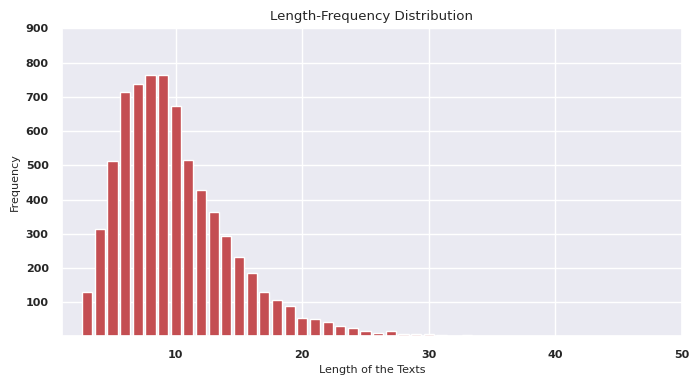

Maximum Length of a text: 69
Minimum Length of a text: 3
Average Length of a text: 10.0


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming data is your DataFrame

# Calculate text length
data['TextLength'] = data['cleaned'].apply(lambda x: len(x.split()))
filtered_data = data[data['TextLength'] >= 3]
filtered_frequency = dict()
for i in filtered_data['TextLength']:
    filtered_frequency[i] = filtered_frequency.get(i, 0) + 1

# Plot the bar chart for frequency distribution with the filtered data
plt.figure(figsize=(8, 4))
plt.bar(filtered_frequency.keys(), filtered_frequency.values(), color="r")
plt.xlim(1, 50)
plt.ylim(1, 900)
plt.xlabel('Length of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()

# Print statistics for the filtered data
print(f"Maximum Length of a text: {max(filtered_data['TextLength'])}")
print(f"Minimum Length of a text: {min(filtered_data['TextLength'])}")
print(f"Average Length of a text: {round(np.mean(filtered_data['TextLength']), 0)}")

In [26]:
category_list = data['label'].unique()
category_list
category_list = ['Software Engineering', 'DBMS', 'Data Communication',
       'Cyber Security', 'Operating System']

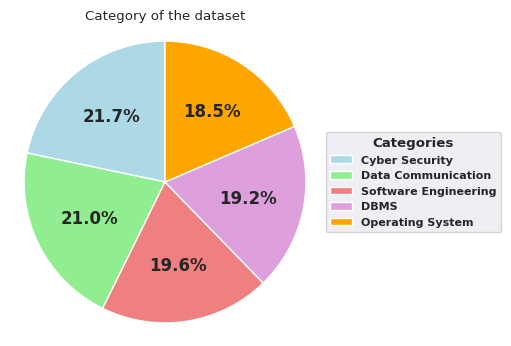

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame and contains a 'label' column representing categories

# Calculate the frequency of each category in the data
category_counts = data['label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4,4))  # Increase the figure size for better readability
plt.pie(
    category_counts,
    labels=None,  # Remove labels from the pie chart
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightgreen', 'lightcoral', 'plum', 'orange']
)

# Add a legend with category names
plt.legend(category_counts.index, title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))

# Customize the plot
plt.title('Category of the dataset')
plt.axis('equal')

# Show the plot
plt.show()


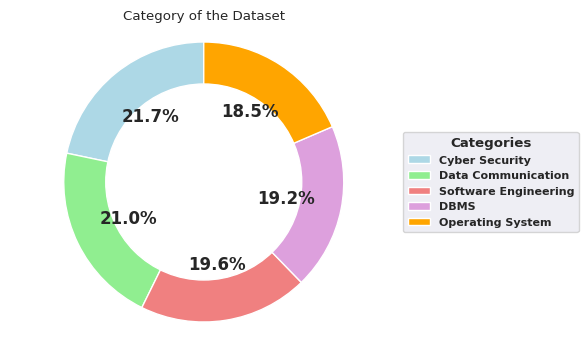

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame and contains a 'label' column representing categories

# Calculate the frequency of each category in the data
category_counts = data['label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 4))  # Increase the figure size for better readability
plt.pie(
    category_counts,
    labels=None,  # Remove labels from the pie chart
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightgreen', 'lightcoral', 'plum', 'orange']
)

# Add a white circle at the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a legend with category names
plt.legend(category_counts.index, title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))

# Customize the plot
plt.title('Category of the Dataset')
plt.axis('equal')

# Show the plot
plt.show()


In [29]:
cleaned_text = data['cleaned']
cleaned_text

0       সফটওয়্যার ইঞ্জিনিয়ারিং দুইটি শব্দ সফটওয়্যার...
1                           সফটওয়্যার প্রোগ্রামের সমষ্টি
2       প্রোগ্রাম নির্ধারিত সমস্যা সমাধানের উদ্দেশ্যে ...
3       অপরদিকে ইঞ্জিনিয়ারিং সকল নীতিমালা মেথড সমূহ প...
4                         সফটওয়্যার ইঞ্জিনিয়ারিং বুঝায়
                              ...                        
7295    ডেটা বিতরণের ডেটা ভাগ সুবিধা প্রতিটি সাইট স্থা...
7296    কেন্দ্রীভূত সিস্টেমে কেন্দ্রীয় সাইটের ডাটাবেস...
7297    বিতরণ ব্যবস্থায় সমগ্র সিস্টেমের দায়ী বিশ্বব্...
7298    দায়িত্বগুলির অংশ প্রতিটি সাইটের স্থানীয় ডাটা...
7299    সমজাতীয় বিতরণ ডাটাবেস সিস্টেমে নোডগুলি বিশ্বব...
Name: cleaned, Length: 7300, dtype: object

In [30]:
refined_sentence = " ".join(cleaned_text)

In [31]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf

--2024-05-16 22:01:03--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... failed: Temporary failure in name resolution.
wget: unable to resolve host address 'www.omicronlab.com'


In [33]:
!pip install wordcloud matplotlib

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [35]:
words = refined_sentence.split()

In [36]:
from collections import Counter

word_counts = Counter(words)

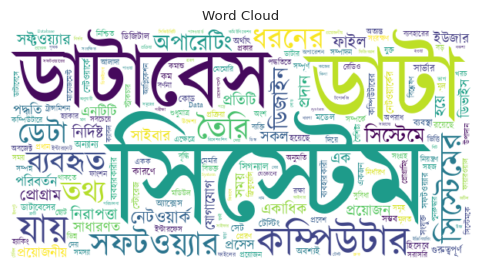

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ওয়ার্ড ক্লাউড জেনারেট
wordcloud = WordCloud(
    font_path='/kaggle/input/banglafont/kalpurush.ttf',  # Specify the font path as necessary
    width=600,
    height=300,
    background_color='white'
).generate_from_frequencies(word_counts)

# ওয়ার্ড ক্লাউড প্রদর্শন
plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")
plt.show()

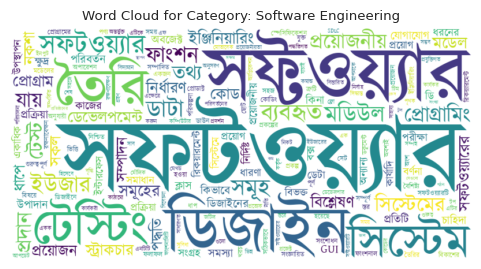

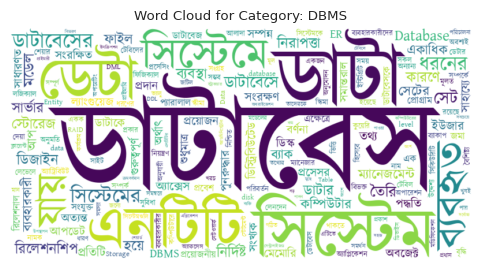

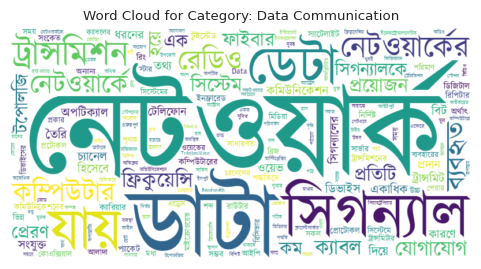

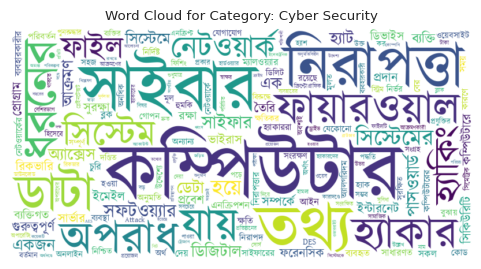

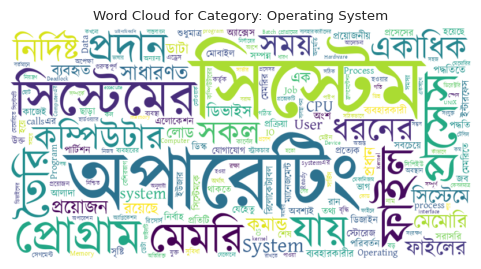

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Assuming 'data' is your DataFrame and 'label' is the column with categories
categories = data['label'].unique()  # Get unique categories

# Iterate through each category
for category in categories:
    # Filter data for the current category
    category_data = data[data['label'] == category]

    # Combine all cleaned texts for the current category into a single string
    category_text = " ".join(category_data['cleaned'])

    # Split the text into words and calculate word frequencies
    words = category_text.split()
    word_counts = Counter(words)

    # Generate the word cloud for the current category
    wordcloud = WordCloud(
        font_path='/kaggle/input/banglafont/kalpurush.ttf',  # Specify the font path as necessary
        width=800,
        height=400,
        background_color='white'
    ).generate_from_frequencies(word_counts)

    # Display the word cloud
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Category: {category}")
    plt.show()

In [39]:
# Split the data into training, validation, and testing sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Print the shapes of the resulting datasets
print("Training data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (5110, 4)
Validation data shape: (1095, 4)
Testing data shape: (1095, 4)


In [40]:
train_data['enc_label'] = train_data['label'].replace({'Software Engineering':0, 'DBMS':1, 'Data Communication':2 ,'Cyber Security':3,
 'Operating System':4})
val_data['enc_label'] = val_data['label'].replace({'Software Engineering':0, 'DBMS':1, 'Data Communication':2 ,'Cyber Security':3,
 'Operating System':4})

In [41]:
train_data['cleaned'].tolist()

['ধরনের পরিস্থিতি মোকাবেলা দরকার ইন্টেলেকচুয়াল প্রপার্টি আইনের প্রয়োগ',
 'কম্পিউটার ভাইরাস মূলত প্রোগ্রামারদের ডেভেলপ ক্ষতিকর প্রোগ্রাম',
 'তাছাড়া ভাটা দ্রুত পড়া Read যায়',
 'প্রযুক্তির অনুমতি প্রক্রিয়াকরণ ট্রান্সপন্ডার ত্রুটি কর্মক্ষমতা ডিজিটাল সিগন্যালিংয়ের উন্নতি উপলব্ধি ব্যবহারে আসা',
 'ফাইল মুছে ফেলার নামযুক্ত ফাইলের ডিরেক্টরি অনুসন্ধান',
 'আরেক দল ক্র্যাকার সফটওয়্যার টুলের সিস্টেমে অবৈধভাবে প্রবেশ',
 'পাসিং রেফারেন্স বাদ কথোপকথনের অংশ সফ্টওয়্যার কমই উল্লেখ',
 'মডুলেটেড ক্যারিয়ার ওয়েভের প্রেক্ষিতেও মডুলেশন ইনডেক্সকে সংজ্ঞায়িত যায়',
 'অবজেক্ট অরিয়েন্টেড ডাটা মডেল মূলত অবজেক্ট অরিয়েন্টেড প্রোগ্রামিং ল্যাংগুয়েজের ধারণার প্রতিষ্ঠিত',
 'সিস্টেমটি ব্যবহারযোগ্য দক্ষতার ডেটা পুনরুদ্ধার',
 'কমান্ড পেলে প্রোগ্রাম ডিস্ক মেমোরিতে পূর্বের প্রোগ্রাম ওভাররাইট',
 'সিগন্যালের সেকেন্ডে ডাটা ট্রান্সফারের হারকে Data Rate',
 'কোড লেখার সময় প্রোগ্রামারগণ কোড উদ্দেশ্য কারা লিখছে কোথায় প্রয়োজন',
 'উপাদানস্তরের নকশা সফ্টওয়্যার আর্কিটেকচারের কাঠামোগত উপাদানগুলিকে সফ্টওয়্যার উপাদানগুলির পদ্ধতিগত বিবরণে

In [42]:
train_data['enc_label'].value_counts()

enc_label
3    1122
2    1084
0    1004
1     973
4     927
Name: count, dtype: int64

In [43]:
val_data['enc_label'].value_counts()

enc_label
2    228
0    225
3    219
1    212
4    211
Name: count, dtype: int64

In [44]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [45]:
train_data = train_data.rename(columns={'label_Software Engineering':'Software Engineering','label_DBMS':'DBMS',
                                        'label_Data Communication':'Data Communication','label_Cyber Security':'Cyber Security','label_Operating System':'Operating System'})

train_data

,text,label,cleaned,TextLength,enc_label
4041,এই ধরনের পরিস্থিতি মোকাবেলা করতে দরকার হয় ইন্ট...,Cyber Security,ধরনের পরিস্থিতি মোকাবেলা দরকার ইন্টেলেকচুয়াল প...,8,3
4258,কম্পিউটার ভাইরাস মূলত প্রোগ্রামারদের ডেভেলপ কর...,Cyber Security,কম্পিউটার ভাইরাস মূলত প্রোগ্রামারদের ডেভেলপ ক্...,7,3
1748,তাছাড়া এটি হতে ভাটা দ্রুত পড়া (Read) যায়।,DBMS,তাছাড়া ভাটা দ্রুত পড়া Read যায়,6,1
6581,"প্রযুক্তির অনুমতি হিসাবে, প্রক্রিয়াকরণ ট্রান্...",Data Communication,প্রযুক্তির অনুমতি প্রক্রিয়াকরণ ট্রান্সপন্ডার ...,12,2
6911,"একটি ফাইল মুছে ফেলার জন্য, আমরা নামযুক্ত ফাইলে...",Operating System,ফাইল মুছে ফেলার নামযুক্ত ফাইলের ডিরেক্টরি অনুস...,7,4
...,...,...,...,...,...
5191,স্বয়ংক্রিয়ভাবে এক জব থেকে অন্য জবে যাওয়ার উপর ...,Operating System,স্বয়ংক্রিয়ভাবে এক জব জবে যাওয়ার ভিত্তি অপারেটি...,13,4
5226,সার্ভার প্রথমে ক্লায়েন্টের নিকট হতে নির্দিষ্ট ...,Operating System,সার্ভার প্রথমে ক্লায়েন্টের নিকট নির্দিষ্ট Part...,8,4
5390,যদি কোনো System-এ Deadlock prevention বা Deadl...,Operating System,Systemএ Deadlock prevention Deadlock avoidance...,10,4
860,কম্পিউটার প্রোগ্রামিং ভাষা প্রয়োগের মাধ্যমে সফ...,Software Engineering,কম্পিউটার প্রোগ্রামিং ভাষা প্রয়োগের সফটওয়্যার ...,8,0


In [52]:
def char_length(row):
    return len(row.split())

In [53]:
lables = ['Software Engineering' 'DBMS' 'Data Communication' 'Cyber Security'
 'Operating System']

# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1.0].cleaned) for word in t.strip().split()]
    print(f"\nClass Name:--> {l} ")
    print("Number of Words:{}".format(len(word_list)))
    print("Number of Unique Words:{}".format(len(np.unique(word_list))))
    print("Maximum post length: {}".format(max(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1.0].cleaned.apply(char_length))))

In [55]:
# Class Distribution
class_distribution = train_data['label'].value_counts()

# Text Length Distribution
train_data['text_length'] = train_data['cleaned'].apply(lambda x: len(x.split()))
text_length_stats = train_data['text_length'].describe()

print("Class Distribution:")
print(class_distribution)
print("\nText Length Distribution:")
print(text_length_stats)

Class Distribution:
label
Cyber Security          1122
Data Communication      1084
Software Engineering    1004
DBMS                     973
Operating System         927
Name: count, dtype: int64

Text Length Distribution:
count    5110.000000
mean        9.935225
std         4.734930
min         1.000000
25%         7.000000
50%         9.000000
75%        12.000000
max        59.000000
Name: text_length, dtype: float64


In [57]:
import pandas as pd

# Assuming train_data is a pandas DataFrame that contains the training data

# Calculate the count of data in each category
class_distribution = train_data['label'].value_counts()

# Print the count of data in each category
print("Class Distribution:")
print(class_distribution)
print()

# Initialize the class_statistics dictionary
class_statistics = {}

# Iterate over each unique class
for class_name in train_data['label'].unique():
    # Filter the training data for the current class
    class_data = train_data[train_data['label'] == class_name]

    # Number of Words
    total_words = class_data['cleaned'].apply(lambda x: len(x.split())).sum()

    # Number of Unique Words
    unique_words = len(set(" ".join(class_data['cleaned']).split()))

    # Maximum Post Length
    max_length = class_data['cleaned'].apply(lambda x: len(x.split())).max()

    # Average Words in Texts
    average_length = class_data['cleaned'].apply(lambda x: len(x.split())).mean()

    # Store the statistics for the current class
    class_statistics[class_name] = {
        'Number of Words': total_words,
        'Number of Unique Words': unique_words,
        'Maximum Post Length': max_length,
        'Average Words in texts': average_length
    }

# Print the statistics for each class
for class_name, stats in class_statistics.items():
    print("Class Name:", class_name)
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value}")
    print()



Class Distribution:
label
Cyber Security          1122
Data Communication      1084
Software Engineering    1004
DBMS                     973
Operating System         927
Name: count, dtype: int64

Class Name: Cyber Security
Number of Words: 11055
Number of Unique Words: 3615
Maximum Post Length: 59
Average Words in texts: 9.852941176470589

Class Name: DBMS
Number of Words: 9610
Number of Unique Words: 2863
Maximum Post Length: 38
Average Words in texts: 9.87667009249743

Class Name: Data Communication
Number of Words: 10598
Number of Unique Words: 3532
Maximum Post Length: 33
Average Words in texts: 9.776752767527675

Class Name: Operating System
Number of Words: 8974
Number of Unique Words: 2990
Maximum Post Length: 34
Average Words in texts: 9.680690399137001

Class Name: Software Engineering
Number of Words: 10532
Number of Unique Words: 3112
Maximum Post Length: 57
Average Words in texts: 10.49003984063745



In [58]:
class_distribution = val_data['label'].value_counts()

# Print the count of data in each category
print("Class Distribution:")
print(class_distribution)
print()
class_statistics = {}

# Iterate over each unique class
for class_name in val_data['label'].unique():
    # Filter the training data for the current class
    class_data = val_data[val_data['label'] == class_name]

    # Number of Words
    total_words = class_data['cleaned'].apply(lambda x: len(x.split())).sum()

    # Number of Unique Words
    unique_words = len(set(" ".join(class_data['cleaned']).split()))

    # Maximum Post Length
    max_length = class_data['cleaned'].apply(lambda x: len(x.split())).max()

    # Average Words in Texts
    average_length = class_data['cleaned'].apply(lambda x: len(x.split())).mean()

    # Store the statistics for the current class
    class_statistics[class_name] = {
        'Number of Words': total_words,
        'Number of Unique Words': unique_words,
        'Maximum post length': max_length,
        'Average Words in texts': average_length
    }

# Print the statistics for each class
for class_name, stats in class_statistics.items():
    print("Class Name:", class_name)
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value}")
    print()


Class Distribution:
label
Data Communication      228
Software Engineering    225
Cyber Security          219
DBMS                    212
Operating System        211
Name: count, dtype: int64

Class Name: Operating System
Number of Words: 2036
Number of Unique Words: 1115
Maximum post length: 30
Average Words in texts: 9.649289099526067

Class Name: Cyber Security
Number of Words: 2126
Number of Unique Words: 1205
Maximum post length: 27
Average Words in texts: 9.707762557077626

Class Name: DBMS
Number of Words: 2089
Number of Unique Words: 1044
Maximum post length: 27
Average Words in texts: 9.85377358490566

Class Name: Data Communication
Number of Words: 2217
Number of Unique Words: 1251
Maximum post length: 36
Average Words in texts: 9.723684210526315

Class Name: Software Engineering
Number of Words: 2458
Number of Unique Words: 1296
Maximum post length: 32
Average Words in texts: 10.924444444444445



In [59]:
class_distribution = test_data['label'].value_counts()

# Print the count of data in each category
print("Class Distribution:")
print(class_distribution)
print()
class_statistics = {}
# Iterate over each unique class
for class_name in test_data['label'].unique():
    # Filter the training data for the current class
    class_data = test_data[test_data['label'] == class_name]

    # Number of Words
    total_words = class_data['cleaned'].apply(lambda x: len(x.split())).sum()

    # Number of Unique Words
    unique_words = len(set(" ".join(class_data['cleaned']).split()))

    # Maximum Post Length
    max_length = class_data['cleaned'].apply(lambda x: len(x.split())).max()

    # Average Words in Texts
    average_length = class_data['cleaned'].apply(lambda x: len(x.split())).mean()

    # Store the statistics for the current class
    class_statistics[class_name] = {
        'Number of Words': total_words,
        'Number of Unique Words': unique_words,
        'Maximum post length': max_length,
        'Average Words in texts': average_length
    }

# Print the statistics for each class
for class_name, stats in class_statistics.items():
    print("Class Name:", class_name)
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value}")
    print()


Class Distribution:
label
Cyber Security          243
Data Communication      222
DBMS                    216
Operating System        215
Software Engineering    199
Name: count, dtype: int64

Class Name: DBMS
Number of Words: 2132
Number of Unique Words: 1090
Maximum post length: 69
Average Words in texts: 9.87037037037037

Class Name: Software Engineering
Number of Words: 2021
Number of Unique Words: 1083
Maximum post length: 36
Average Words in texts: 10.155778894472363

Class Name: Cyber Security
Number of Words: 2546
Number of Unique Words: 1427
Maximum post length: 36
Average Words in texts: 10.477366255144032

Class Name: Data Communication
Number of Words: 2170
Number of Unique Words: 1212
Maximum post length: 27
Average Words in texts: 9.774774774774775

Class Name: Operating System
Number of Words: 2019
Number of Unique Words: 1110
Maximum post length: 25
Average Words in texts: 9.390697674418604

